In [1]:
import numpy as np
import pandas as pd

In [3]:
from skimage import io
import cv2
import matplotlib.pyplot as plt
import pytesseract 
from PIL import Image
from matplotlib import cm

In [5]:
df = pd.read_json('/kaggle/input/vehicle-number-plate-detection/Indian_Number_plates.json', lines=True)
df.head()

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


In [6]:
df['extras'].value_counts()

Series([], Name: extras, dtype: int64)

In [7]:
del(df['extras'])

In [8]:
print(df['annotation'].values[1])

[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.16194331983805602, 'y': 0.850779510022271}, {'x': 0.582995951417004, 'y': 1}], 'imageWidth': 494, 'imageHeight': 449}]


In [9]:
df['x_up'] = df['annotation'].apply(lambda x : int(x[0]['points'][0]['x']*x[0]['imageWidth']))
df['y_up'] = df['annotation'].apply(lambda x : int(x[0]['points'][0]['y']*x[0]['imageHeight']))
df['x_dn'] = df['annotation'].apply(lambda x : int(x[0]['points'][1]['x']*x[0]['imageWidth']))
df['y_dn'] = df['annotation'].apply(lambda x : int(x[0]['points'][1]['y']*x[0]['imageHeight']))

In [10]:
del(df['annotation'])

In [11]:
df['content'][0]

'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg'

In [12]:
img = io.imread(df['content'][0])

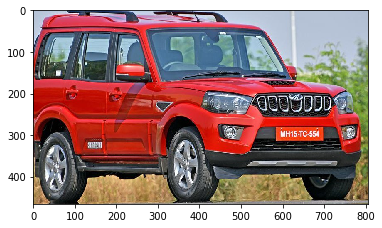

In [13]:
plt.imshow(img)

In [14]:
img.shape

(466, 806, 3)

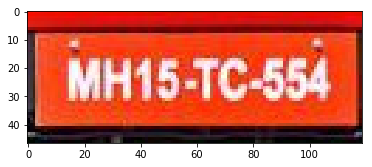

In [15]:
y = df['y_up'][0]
yt = df['y_dn'][0]
x = df['x_up'][0]
xt = df['x_dn'][0]
cp = img[int(y):int(yt), int(x):int(xt)]
plt.imshow(cp)

In [16]:
df[:5]

,content,x_up,y_up,x_dn,y_dn
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,581,273,700,320
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,79,381,288,449
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,41,219,115,259
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,217,312,359,359
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,208,219,865,553


In [18]:
images = []
nplates = []
texts = []
for index,row in df.iterrows():
    img = io.imread(row[0])
    images.append(img)
    crop_img = img[row['y_up']:row['y_dn'], row['x_up']:row['x_dn']]
    crop_img = cv2.resize(crop_img,(150,50))
    crop_img = crop_img[:,:,1] # Chances of green color to be found in a number plate is lesser.
    crop_img = Image.fromarray(crop_img)
    nplates.append(crop_img)
    texts.append(pytesseract.image_to_string(crop_img, lang='eng'))

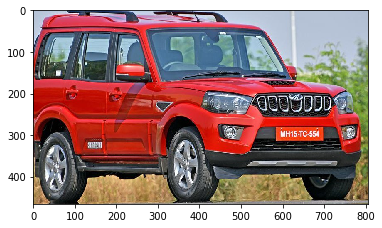

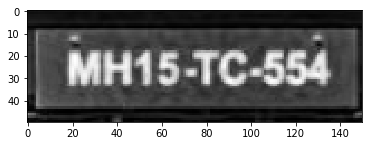

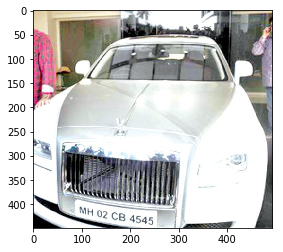

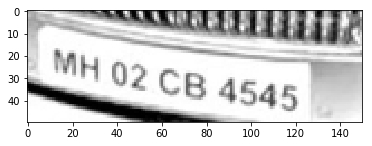

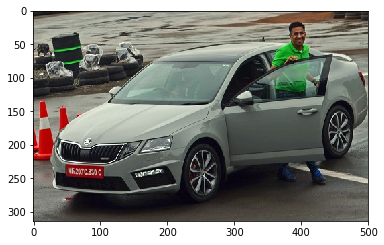

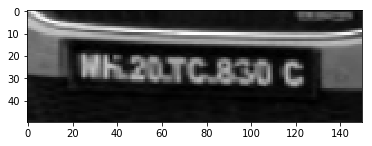

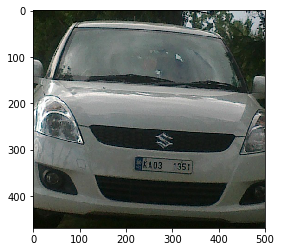

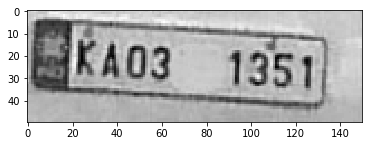

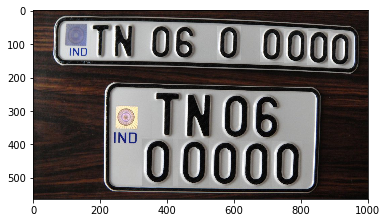

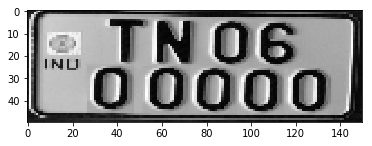

In [20]:
for i in range(5):
    plt.imshow(images[i])
    plt.show()
    plt.imshow(nplates[i],cmap='gray')
    plt.show()